In [1]:
%matplotlib inline
import numpy as np
import scipy.special
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = [8, 6]
matplotlib.rcParams['font.size'] = 16 

## Analytic Exercise #2 (numerical addendum)

The noise in a data set is determined by the Poisson noise in
the expectation value of the signal. However, observationally we often
only have access to one realization of the signal, and often the
quoted errors are based on the Poisson noise in that signal.  If we
take multiple observations and combine them together weighting by the
inverse variance estimated in this way, it leads to a bias. Ignoring
any background contribution to the noise, estimate this bias as a
function of $n$.

The solution to this problem in the answer set leads to an expectation value for the estimator $\hat n$:

$$\langle {\hat n} \rangle = \left\langle\frac{1}{n}\right\rangle^{-1}$$

where $n$ represents any individual observation. The inverse of the average of the inverse of $n$ is not in general equal to the average of $\bar n$; we expect it to be a little larger.

For large $\bar n$, we can approximate the Poisson distribution as Gaussian, and some further approximations lead to the estimate:

$$\langle {\hat n} \rangle = {\bar n} \left(1 + \frac{1}{\bar n}\right)$$

We can evaluate this expectation value more accurately under the Poisson distribution using numerics. But we have to account for what we do in our estimator in cases that the observed $n$ is zero; an inverse variance weighting would lead to an infinite weight, so we can't do that. We will use a variance of unity, but the need to make this choice is just yet another alarm bell that there is something wrong about using the data to estimate its own variance.

In [2]:
def poisson_inverse_mean(nbar=None):
    """Returns mean of the inverse of n under a Poisson distribution with mean nbar
    
    Parameters
    ----------
    
    nbar : float
        mean of Poisson distribution to test
        
    Returns
    -------
    
    invn : float
        mean of inverse of n
        
    Notes
    -----
    
    Determines the mean using 0 <= n <= 5*nbar or 10 (whichever is larger).
"""
    nmax = np.int32(5 * nbar)
    if(nmax < 10):
        nmax = 10
    
    # make Poisson distribution
    ns = np.arange(nmax + 1, dtype=np.float32)
    p = (ns * np.log(nbar) - nbar - scipy.special.gammaln(ns + 1))
    p = np.exp(p)
    
    # make inverse n, but with 1/0 = 1
    invns = ns.copy()
    invns[0] = 1. 
    invns = 1. / invns
    
    invn = (invns * p).sum() / p.sum()
    return(invn)

In [3]:
nn = 1000
nmin = 0.2 
nmax = 20.
nbars = (np.arange(nn)) * (nmax - nmin) / np.float32(nn - 1) + nmin
estn = np.zeros(nn, dtype=np.float32)
for i, nbar in enumerate(nbars):
    estn[i] = 1. / poisson_inverse_mean(nbar=nbar)

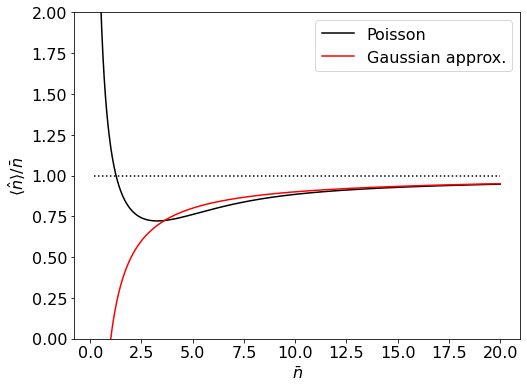

In [4]:
plt.plot(nbars, estn / nbars, color='black', label='Poisson')
plt.plot(nbars, (1. - 1. / (nbars)), color='red', label='Gaussian approx.')
plt.plot(nbars, np.ones(nn, dtype=np.float32), color='black', linestyle='dotted')
plt.xlabel(r'$\bar n$')
plt.ylabel(r'$\langle \hat n \rangle / \bar n$')
plt.ylim([0., 2.])
plt.legend()

When $\bar n$ is low, using $n$ as an estimate of its own variance gets very lousy, and the estimate of $n$ from multiple observations averaged by the inverse variance is very overestimated. This can be changed depending on how $n=0$ observations are treated.

At higher $\bar n$ the estimate gets better but generally will lead to an underestimate. The Gaussian model for this bias is not bad above $\bar n \sim 10$ or so (depending on the precision you need!). Note that this implies that even for $\bar n \approx 100$, using the data itself for an inverse variance estimate leads to a 1\% bias.